In [1]:
%matplotlib inline
import pandas as pd
import librosa as lib
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import scipy

In [2]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [3]:
#importing project created functions, these can be found in model_prep folder in repo
from model_prep import Xy_prep_all, Xy_prep_silence, Xy_prep_music, cross_val_time

In [4]:
from dask import dataframe as dd
import joblib
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
cluster.scheduler, cluster.workers

C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62591 instead
  warnings.warn(


(<Scheduler: "tcp://127.0.0.1:62594" processes: 3 cores: 6>,
 {0: <Nanny: tcp://127.0.0.1:62616, threads: 2>,
  1: <Nanny: tcp://127.0.0.1:62613, threads: 2>,
  2: <Nanny: tcp://127.0.0.1:62619, threads: 2>})

In [5]:
model_data = pd.read_pickle('DFs/model_data.pkl')

In [6]:
rf = RandomForestRegressor()
params = {'criterion':['mse', 'mae'], 'max_depth':[1, 3, 5, 7], 'max_leaf_nodes':[2, 4, 6, 10], 
          'min_samples_split':[.1, .2, .3, .4, .5, .6, .7, .8, .9], 'min_samples_leaf':[.1, .2, .3, .4, .5]}
rsearch = RandomizedSearchCV(estimator=rf, param_distributions = params, 
                             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], refit='neg_mean_absolute_error')
X_train, X_test, y_train, y_test, cols, participants, cut_rows = Xy_prep_silence(model_data, 'target_20', 10, 15)
with joblib.parallel_backend('dask'):
    rsearch.fit(X_train, y_train)
rsearch.cv_results_

C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-39.22227984 -39.22779373          nan -40.08694235 -33.51591478
 -32.30069808 -40.12824554 -39.21771432 -31.44326395 -39.22448062]
  warnings.warn(
C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2165.94072677 -2164.50932305            nan -2133.6880541
 -1673.09273039 -1494.68174835 -2136.90433213 -2164.95640806
 -1535.5836061  -2163.05743487]
  warnings.warn(


{'mean_fit_time': array([ 8.41574554,  8.91324286, 17.40435381, 37.90509052, 50.04016676,
        23.30360789,  5.49939475, 11.43665709,  6.73003731,  4.06788683]),
 'std_fit_time': array([ 0.81082887,  0.59704249, 11.93044904, 13.9863061 ,  2.87532652,
        12.98066759,  4.03393545,  0.78897023,  1.78419041,  2.34953409]),
 'mean_score_time': array([0.32351327, 0.58251972, 0.3746388 , 0.32940979, 0.18635993,
        0.10434499, 0.16865997, 0.11310806, 0.14539661, 0.05979962]),
 'std_score_time': array([0.25211331, 0.05949634, 0.23148972, 0.15419391, 0.09228098,
        0.07652522, 0.13884654, 0.07513267, 0.05898763, 0.01889337]),
 'param_min_samples_split': masked_array(data=[0.9, 0.5, 0.8, 0.9, 0.3, 0.2, 0.6, 0.3, 0.1, 0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[0.5, 0.4, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.5],


In [7]:
rsearch.best_score_, rsearch.best_params_, rsearch.score(X_test, y_test)

(-31.44326394636422,
 {'min_samples_split': 0.1,
  'min_samples_leaf': 0.3,
  'max_leaf_nodes': 6,
  'max_depth': 1,
  'criterion': 'mse'},
 -31.894787448890874)

In [8]:
rf = RandomForestRegressor()
params = {'criterion':['mse', 'mae'], 'max_depth':[1, 3, 5, 7], 'max_leaf_nodes':[2, 4, 6, 10], 
          'min_samples_split':[.1, .2, .3, .4, .5, .6, .7, .8, .9], 'min_samples_leaf':[.1, .2, .3, .4, .5]}
rsearch = RandomizedSearchCV(estimator=rf, param_distributions = params, 
                             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], refit='neg_mean_absolute_error')
X_train, X_test, y_train, y_test, cols, participants, cut_rows = Xy_prep_silence(model_data, 'target_20', 10, 10)
with joblib.parallel_backend('dask'):
    rsearch.fit(X_train, y_train)
rsearch.cv_results_

{'mean_fit_time': array([5.39719439, 5.95808101, 5.15217605, 6.25174112, 5.3750176 ,
        5.25180893, 9.3336441 , 6.41203456, 2.92711906, 1.9081131 ]),
 'std_fit_time': array([1.89178588, 0.28538877, 1.74174473, 0.49106401, 2.06342889,
        3.10102388, 1.12990899, 2.9698917 , 2.35238349, 0.71207362]),
 'mean_score_time': array([0.12841754, 0.16640668, 0.09579816, 0.12220707, 0.09179845,
        0.16280112, 0.0751996 , 0.09070492, 0.07059994, 0.07340178]),
 'std_score_time': array([0.05122333, 0.0531332 , 0.05700933, 0.05044385, 0.01934613,
        0.06620118, 0.02919918, 0.04043809, 0.02071345, 0.02168307]),
 'param_min_samples_split': masked_array(data=[0.9, 0.4, 0.3, 0.4, 0.2, 0.6, 0.5, 0.6, 0.4, 0.9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[0.4, 0.1, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.5, 0.4],
              mask=[

In [9]:
rsearch.best_score_, rsearch.best_params_, rsearch.score(X_test, y_test)

(-13.558031228911599,
 {'min_samples_split': 0.6,
  'min_samples_leaf': 0.4,
  'max_leaf_nodes': 2,
  'max_depth': 5,
  'criterion': 'mae'},
 -4.788466963022576)

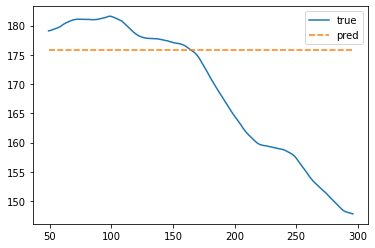

In [20]:
y_pred = rsearch.predict(X_test)
plot_pred = pd.DataFrame(y_pred, columns=['pred'])
plot_pred.insert(0, value=y_test, column='true')
sns.lineplot(data=plot_pred.rolling(50).mean())
plt.show()

In [11]:
elastic = ElasticNet()
params_elastic = {'alpha':[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], 'l1_ratio':[.1, .2, .3, .4, .5, .6, .7, .8, .9]}
rsearch_elastic = RandomizedSearchCV(estimator=elastic, param_distributions = params_elastic, 
                             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], refit='neg_mean_absolute_error')
X_train, X_test, y_train, y_test, cols, participants, cut_rows = Xy_prep_silence(model_data, 'target_10', 7, 17)
with joblib.parallel_backend('dask'):
    rsearch_elastic.fit(X_train, y_train)
rsearch_elastic.cv_results_

C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18760.615003843093, tolerance: 371.28178151976283
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([15.14331207, 11.71820936, 22.98547826,  8.04159365,  6.42572575,
        10.2306592 , 14.18181276, 13.53390303, 10.99760232, 10.3583992 ]),
 'std_fit_time': array([6.79399304, 5.11114405, 8.91270731, 4.43128309, 3.43094647,
        4.36290149, 4.33118653, 4.52353957, 6.89377704, 6.64520359]),
 'mean_score_time': array([0.00280046, 0.00299792, 0.00239792, 0.00239935, 0.00210338,
        0.00479846, 0.00259662, 0.00240149, 0.00219784, 0.00280523]),
 'std_score_time': array([0.00116675, 0.00063212, 0.00049311, 0.00049025, 0.0002074 ,
        0.0026381 , 0.00079822, 0.0004889 , 0.00039454, 0.00098465]),
 'param_l1_ratio': masked_array(data=[0.5, 0.4, 0.3, 0.8, 0.6, 0.6, 0.3, 0.5, 0.7, 0.7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_alpha': masked_array(data=[0.7, 0.7, 1, 0.9, 1, 0.9, 0.7, 1, 0.2, 0.4],
              mask=[False, False, Fa

In [12]:
rsearch_elastic.best_score_, rsearch_elastic.best_params_, rsearch_elastic.score(X_test, y_test)

(-13.76433117773557, {'l1_ratio': 0.4, 'alpha': 0.7}, -13.325611013017193)

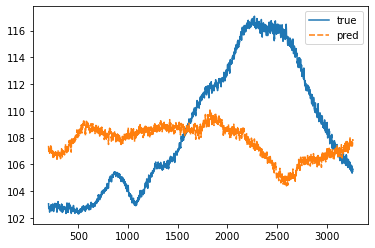

In [13]:
y_pred = rsearch_elastic.predict(X_test)
plot_pred = pd.DataFrame(y_pred, columns=['pred'])
plot_pred.insert(0, value=y_test, column='true')
sns.lineplot(data=plot_pred.rolling(200).mean())
plt.show()

In [14]:
elastic = ElasticNet(alpha=.6, l1_ratio=.5, max_iter=20000, selection='random')
scores = {'PID':[], 'test_score':[], 'mae':[]}
preds=pd.DataFrame()
for i in range(20, 30):
    X_train, X_test, y_train, y_test, cols, participants, cut_rows = Xy_prep_silence(model_data, 'target_20', i, i)
    with joblib.parallel_backend('dask'):
        elastic.fit(X_train, y_train)
    y_pred = elastic.predict(X_test)
    scores['PID'].append(i)
    scores['mae'].append(mean_absolute_error(y_test, y_pred))
    preds[str(i) + 'pred'] = y_pred
    preds[str(i) + 'actual'] = y_test
    scores['test_score'].append(elastic.score(X_test, y_test))
    

C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645.4497614939719, tolerance: 6.9097671704667
  model = cd_fast.enet_coordinate_descent(
C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1840.517839939128, tolerance: 9.364514507411844
  model = cd_fast.enet_coordinate_descent(
C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12104.134484628245, tolerance: 53.20053510025544
  model = cd_fast.enet_coordinate_descent(
C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages

In [15]:
pd.DataFrame(scores)

,PID,test_score,mae
0,20,-2.732152,10.126896
1,21,-1.647333,9.831053
2,22,0.174804,6.999862
3,23,-20.952560,57.086393
4,24,-0.594694,27.606929
5,25,-6.438163,21.459088
6,26,-0.047100,5.825523
7,27,0.441845,11.307691
8,28,-2.004257,12.643087
9,29,0.021689,12.114053


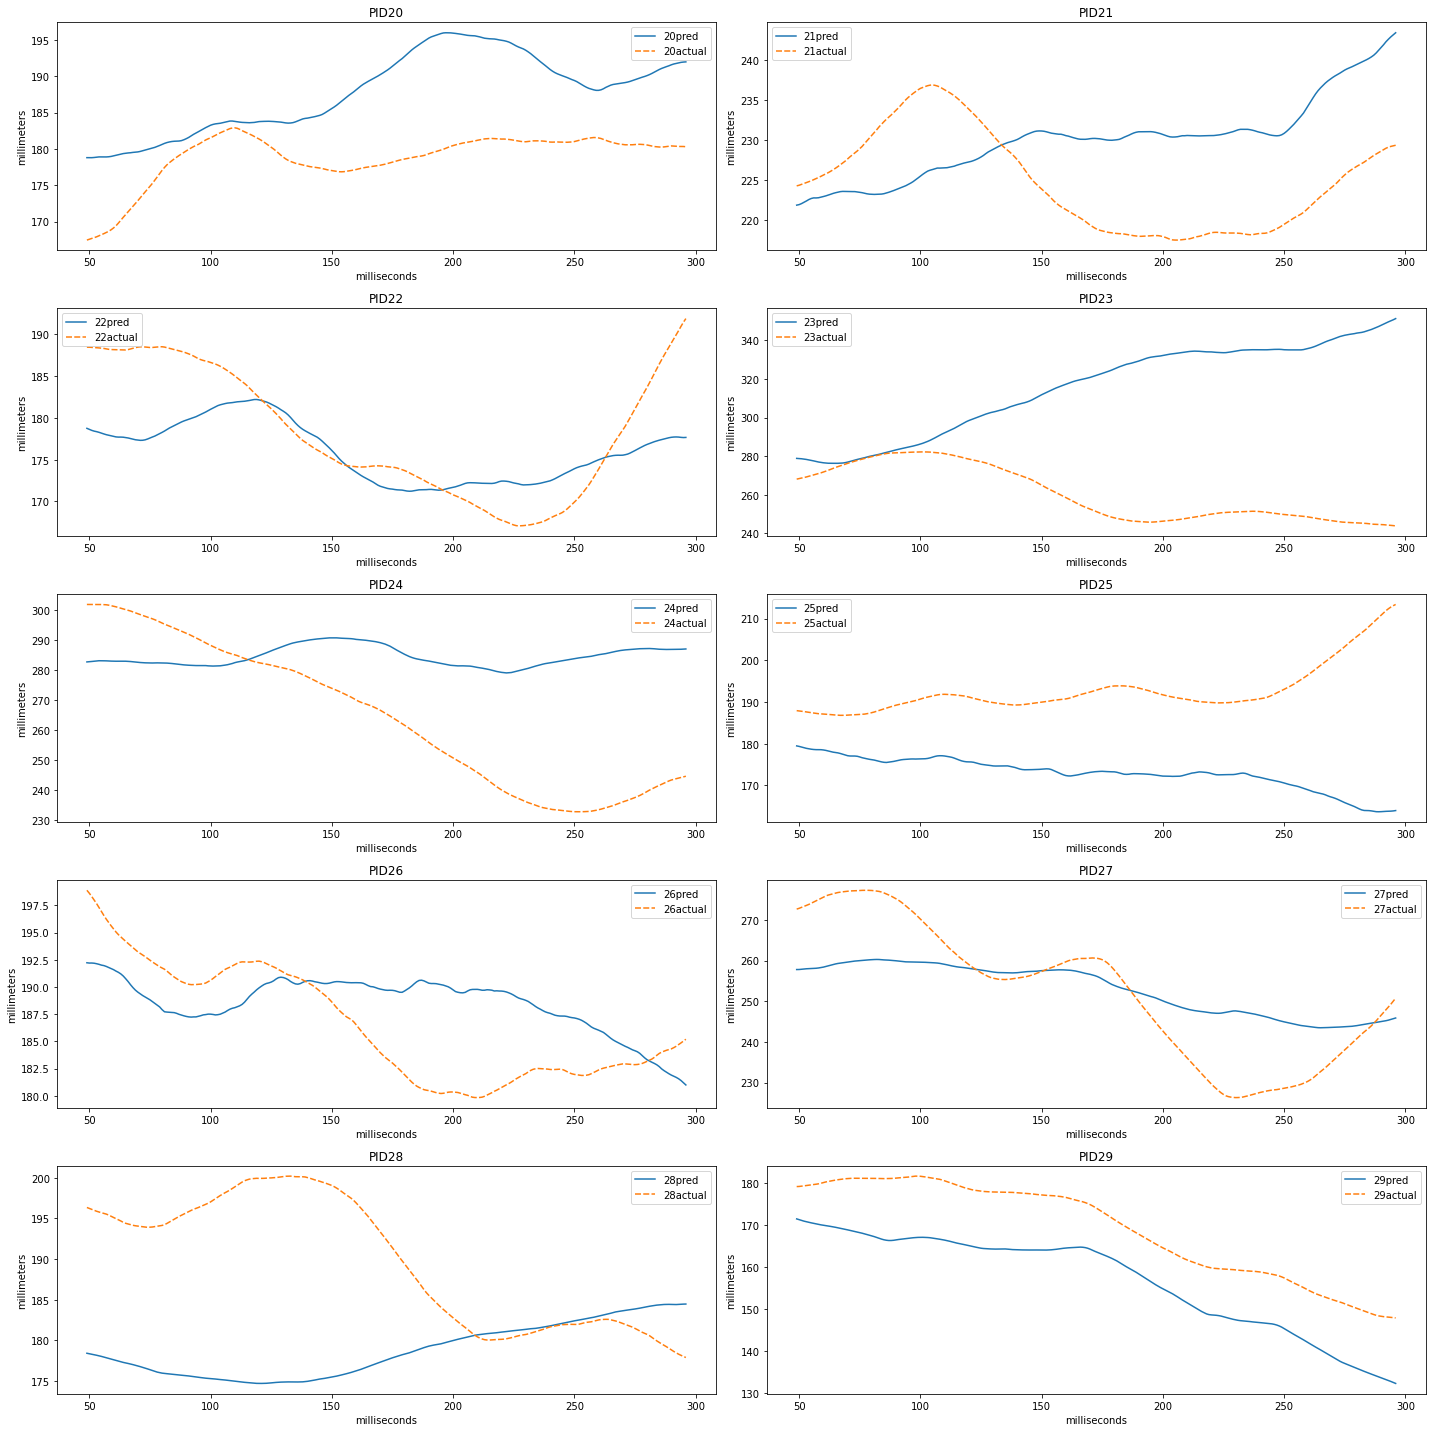

In [16]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
i=20
for ax in axs.flatten():
    sns.lineplot(data=preds[[str(i)+'pred', str(i)+'actual']].rolling(50).mean(), ax=ax)
    ax.set_title('PID' + str(i))
    ax.set_ylabel('millimeters')
    ax.set_xlabel('milliseconds')
    i+=1
plt.tight_layout()
plt.show()

In [17]:
rf = RandomForestRegressor(min_samples_split= 0.2, min_samples_leaf= 0.1, max_leaf_nodes= 10, max_depth= 5,
                           criterion= 'mse')
scores = {'PID':[], 'test_score':[], 'mae':[]}
preds=pd.DataFrame()
for i in range(20, 30):
    X_train, X_test, y_train, y_test, cols, participants, cut_rows = Xy_prep_silence(model_data, 'target_20', i, i)
    with joblib.parallel_backend('dask'):
        rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores['PID'].append(i)
    scores['mae'].append(mean_absolute_error(y_test, y_pred))
    preds[str(i) + 'pred'] = y_pred
    preds[str(i) + 'actual'] = y_test
    scores['test_score'].append(rf.score(X_test, y_test))
    

In [18]:
pd.DataFrame(scores)

,PID,test_score,mae
0,20,-0.856862,7.130062
1,21,-0.052968,6.000810
2,22,-0.049396,8.517878
3,23,-0.039067,13.391193
4,24,0.292324,16.903975
5,25,-3.299451,15.964861
6,26,-1.825245,10.458978
7,27,-0.137146,15.619016
8,28,-0.494445,9.164047
9,29,-0.712898,12.905774


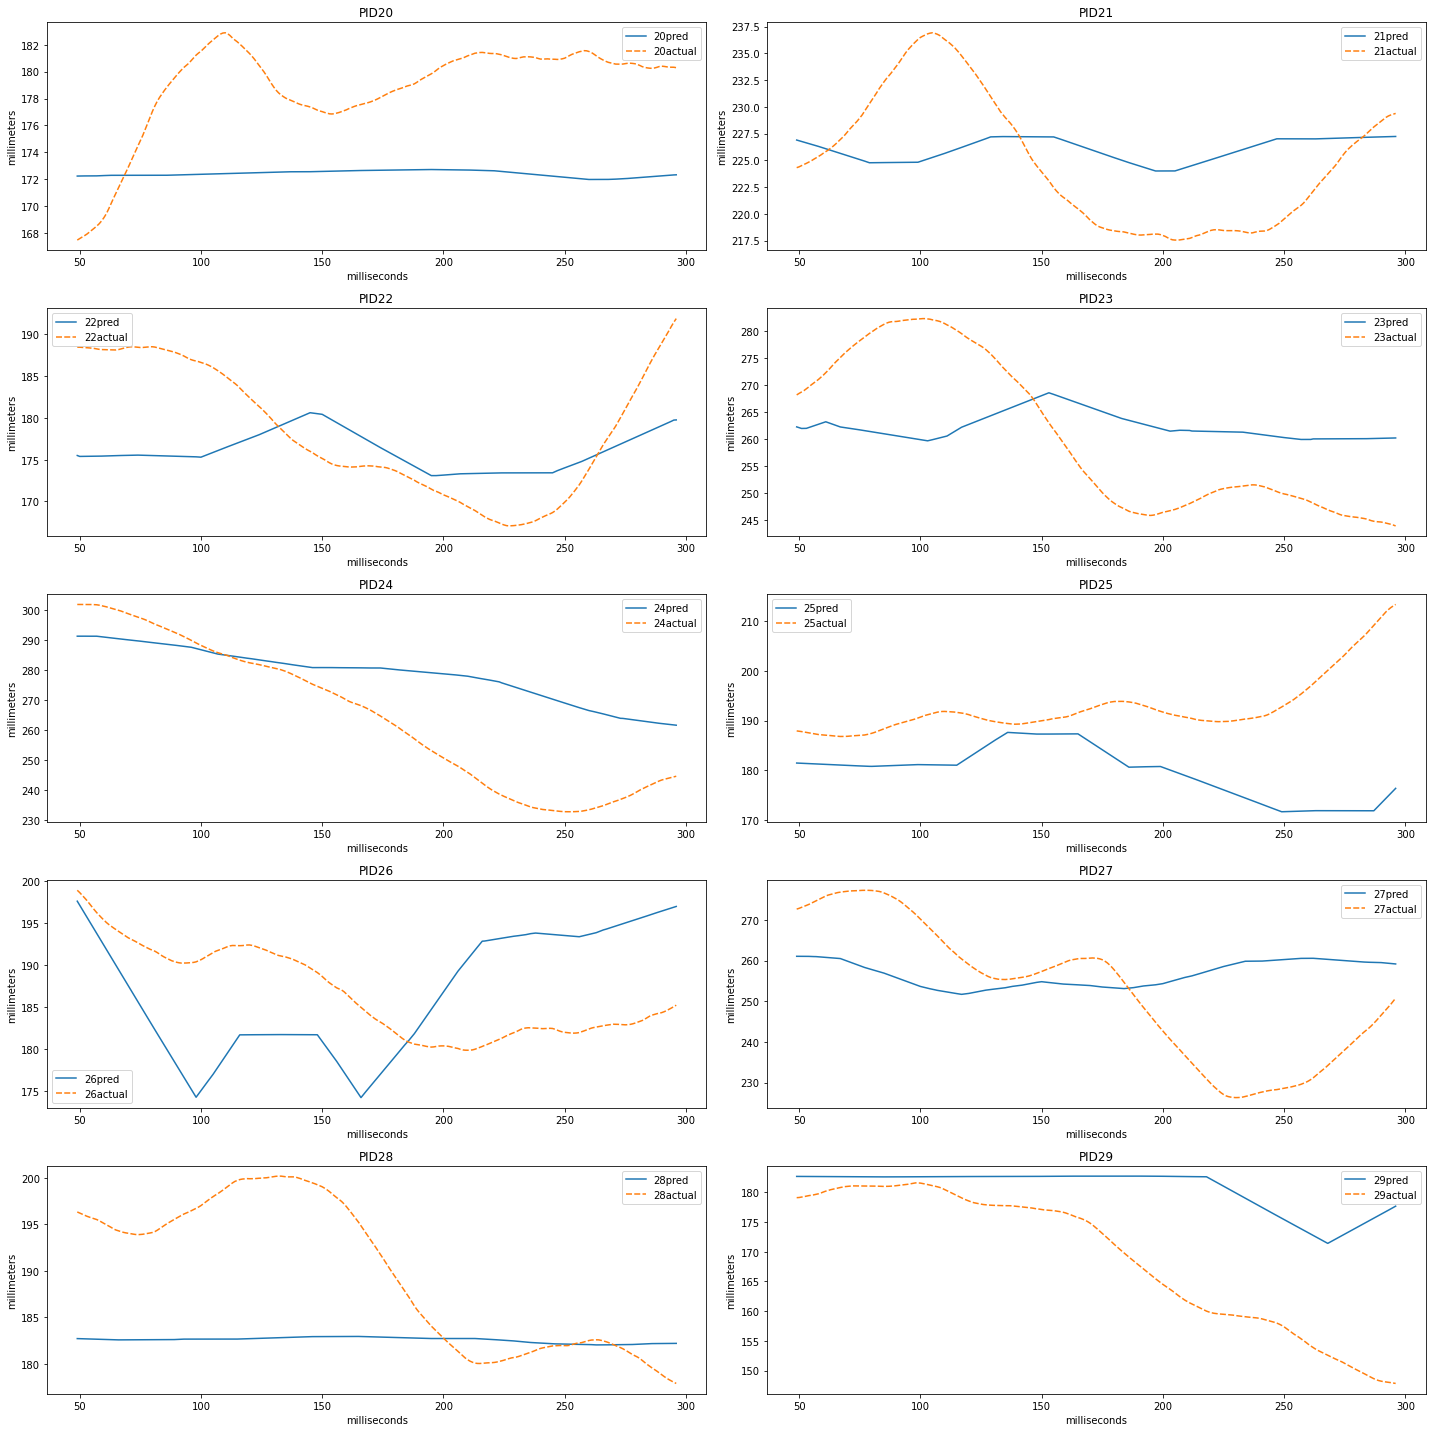

In [19]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
i=20
for ax in axs.flatten():
    sns.lineplot(data=preds[[str(i)+'pred', str(i)+'actual']].rolling(50).mean(), ax=ax)
    ax.set_title('PID' + str(i))
    ax.set_ylabel('millimeters')
    ax.set_xlabel('milliseconds')
    i+=1
plt.tight_layout()
plt.show()

In [21]:
rf = RandomForestRegressor(min_samples_split= 0.2, min_samples_leaf= 0.1, max_leaf_nodes= 10, max_depth= 5,
                           criterion= 'mse')
scores = {'PID':[], 'test_score':[], 'mae':[]}
preds=pd.DataFrame()
X_train, X_test, y_train, y_test, cols, participants, cut_rows = Xy_prep_silence(model_data, 'target_20', 1, 75)
with joblib.parallel_backend('dask'):
    rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test), mean_absolute_error(y_test, y_pred)

(0.29509207061013076, 33.0312157701115)

In [22]:
rf_pred = pd.DataFrame(y_pred, columns=['Prediction'])
rf_pred.insert(0, value=y_test, column='Actual')
rf_pred

,Actual,Prediction
0,190.720661,225.498619
1,181.325351,184.349137
2,170.352298,168.187088
3,262.011594,207.371548
4,187.292178,224.695606
...,...,...
19164,165.778148,172.715044
19165,281.189689,207.371548
19166,177.507700,184.349137
19167,186.262677,168.187088


[]

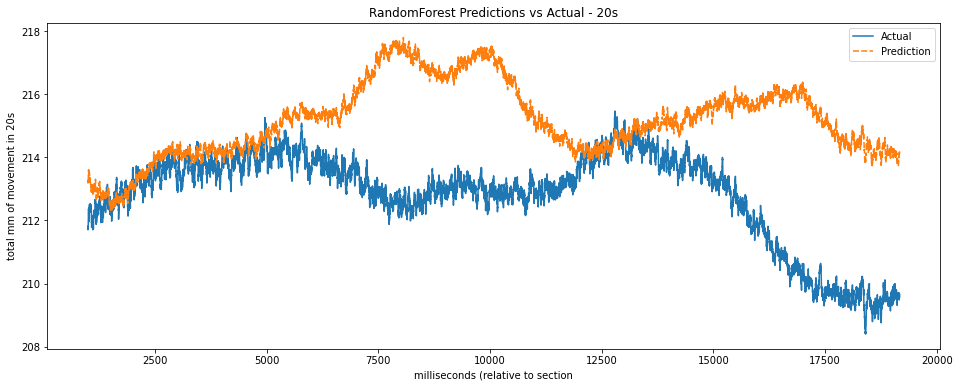

In [25]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=rf_pred.rolling(1000).mean())
plt.title('RandomForest Predictions vs Actual - 20s')
plt.xlabel('milliseconds (relative to section')
plt.ylabel('total mm of movement in 20s')
plt.plot()